In [137]:
#1 import required modules
import time
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.arff import loadarff

from sklearn.datasets import get_data_home
from joblib import Memory
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from urllib.request import urlopen

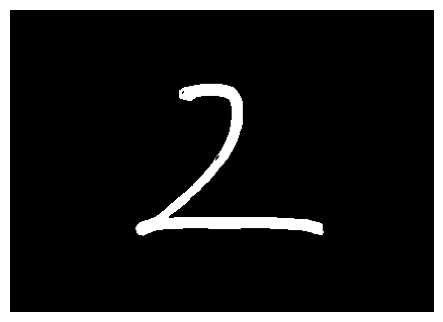

th
<scaled size: (299 x 419) >


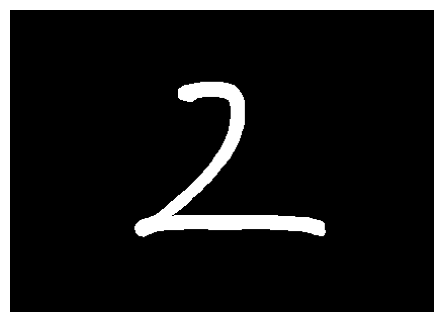

th
<scaled size: (299 x 419) >


In [126]:
import numpy as np
from v4 import vx
from v4 import vd


vd.dispmvx('./data3/10t.vx', capt='th')
vd.dispmvx('10dt.vx', capt='th')

In [ ]:
#create csv file
import os
import csv
 
def create_csv(dirname):
    path='./'+dirname+'/'
    name=os.listdir(path)
    i = 0
    count = 0
    with open ('labels.csv','w') as csvfile:
        writer=csv.writer(csvfile)
        for n in name:
            if count%5==0: 
                i = i+1
            if n[-4:]=='.png':
                print(n)
                writer.writerow(['./'+str(dirname)+'/'+str(n),i-1 ])
            else:
                pass
            count = count +1
        
if __name__ == "__main__":
    create_csv('idata')



In [84]:
""" Custom datatset loader
    based on https://github.com/utkuozbulak/pytorch-custom-dataset-examples
"""
import pandas as pd
import imageio

class SimpleDataset():
    def __init__(self, data_path, csv_name, transform = None ):
        """
        Args:
            data_path (string): path to the folder where images and csv files are located
            csv_name (string): name of the csv lablel file
            transform: pytorch transforms for transforms and tensor conversion
        """
        # Set path
        self.data_path = data_path
        # Read the csv file
        self.data_info = pd.read_csv(data_path + csv_name, header=None)
        # First column contains the image paths
        self.image_arr = np.asarray(self.data_info.iloc[:, 0])
        # Second column is the labels
        self.label_arr = np.asarray(self.data_info.loc[:, 1])
        # Calculate len
        self.data_len = len(self.data_info.index)
        
    def __getitem__(self, index):
        # Get image name from the pandas df
        single_image_name = self.image_arr[index]
        # Open image
        img_as_img = imageio.imread(self.data_path + single_image_name)
        
        # Get label(class) of the image based on the cropped pandas column
        single_image_label = self.label_arr[index]
        
        return (img_as_img, single_image_label)

    def __len__(self):
        return self.data_len

In [134]:
mydata = SimpleDataset( "./idata/", "labels.csv")

#splitting into images and labels 
X = []
y = []
for i in range(len(mydata)):
    X.append(mydata[i][0])
    y.append((mydata[i][1]))

#converting into numpy arrays to enable easy reshaping and other array operations
    
X = np.asarray(X)
print("Shape of the input image", X.shape)
y= np.asarray(y)

Shape of the input image (60, 28, 28)


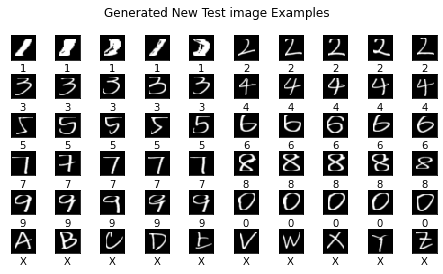

In [135]:
import warnings
warnings.filterwarnings('ignore')
for i in range(60):
    l1_plot = plt.subplot(6, 10, i + 1)
    l1_plot.imshow(X[i], interpolation='nearest',
                   cmap=plt.cm.gray)
    plt.rcParams['figure.figsize'] = (8.0, 4.0)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('%s' % (y[i]))
    plt.subplots_adjust(wspace =0, hspace =0.6)
plt.suptitle('Generated New Test image Examples')
plt.show()

In [132]:
mydata = SimpleDataset( "./idata2/", "labels.csv")

#splitting into images and labels 
X = []
y = []
for i in range(len(mydata)):
    X.append(mydata[i][0])
    y.append((mydata[i][1]))

#converting into numpy arrays to enable easy reshaping and other array operations
    
X = np.asarray(X)
print("Shape of the input image", X.shape)
y= np.asarray(y)

Shape of the input image (60, 28, 28)


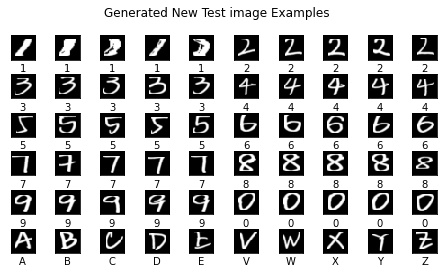

In [133]:
import warnings
warnings.filterwarnings('ignore')
for i in range(60):
    l1_plot = plt.subplot(6, 10, i + 1)
    l1_plot.imshow(X[i], interpolation='nearest',
                   cmap=plt.cm.gray)
    plt.rcParams['figure.figsize'] = (8.0, 4.0)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('%s' % (y[i]))
    plt.subplots_adjust(wspace =0, hspace =0.6)
plt.suptitle('Generated New Test image Examples')
plt.show()